### 1. Import of Python libraries.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoLarsCV
from sklearn.linear_model import ElasticNet
import xgboost

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

### 2. Reading the training dataset

Reading and intitial investigation of training dataset.

In [2]:
# Reading the train data
train_df = pd.read_csv('train.csv')


In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Finding all quantitative columns for Training data
quant_train = [x for x in train_df.columns if train_df.dtypes[x] != 'object'] 
#print(len(quant_train))
#print(quant_train)

In [5]:
# Finding all qualatative columns for Training data
qual_train = [x for x in train_df.columns if train_df.dtypes[x] == 'object'] 
#print(len(qual_train))
#print(qual_train)

In [6]:
# Finding the shape of the train data
rows, columns = train_df.shape
print('No of Rows {0} and No of Columns {1}'. format(rows, columns))

No of Rows 1460 and No of Columns 81


In the training dataset we have 1460 rows and 81 columns among them 43 are categorical type and 37 are continuous. 
Following are Categorical variables:

_'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'_

And these are continuous variables;

_'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'_


### 3. Analysis of 'SalePrice' 

'SalePrice' is our target variable, based on the training dataset we have to predict the 'SalePrice' for the testing dataset. Therefore, it is important for us to understand the nature of this dependent variable. At first, we will try to find the statistics of this variable. 

**3.1 Statistical Analysis**

In [7]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**3.2 Measurement of Skewness and Kurtosis**

Next, we try to measure the Skewness and the Kurtosis of 'SalePrice' 

In [8]:
print('The Skewness is {0}'.format(train_df['SalePrice'].skew()))
print('The Kurtosis is {0}'.format(train_df['SalePrice'].kurt()))

The Skewness is 1.8828757597682129
The Kurtosis is 6.536281860064529


As we know, if the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), and here for the 'SalePrice' as we can see the value is about 2 which is considered as highly skewed.

In similar fashion, the Kurtosis is measured in two different ways, Leptokurtic (Kurtosis > 3) i.e. the distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers. 

**3.3 Distribution of SalePrice column**

Next, we try to find the distribution of the 'SalePrice', the first one we try to compare the 'SalePrice' with Normal Distribution.

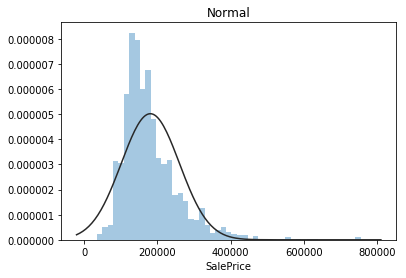

In [9]:
y = train_df['SalePrice']

plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)

Since, the SalePrice is not fitting with the Normal Distribution, next, we try to find the log distribution of the 'SalePrice'. 

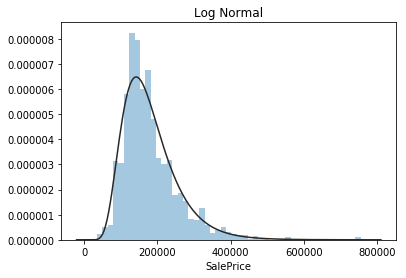

In [10]:
plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

And, we can see that the Sales Price is fitting much more for the log normal distribution, keeping that in mind we can safely say for training and testing purpose conversion of SalePrice into log scale will give us better result.

**3.4 Distribution of other continuous variables** 

Next, we want to investigate the distribution of all the continuous independent variables.as this will give us the idea about their nature and importance respective to the 'SalePrice'.

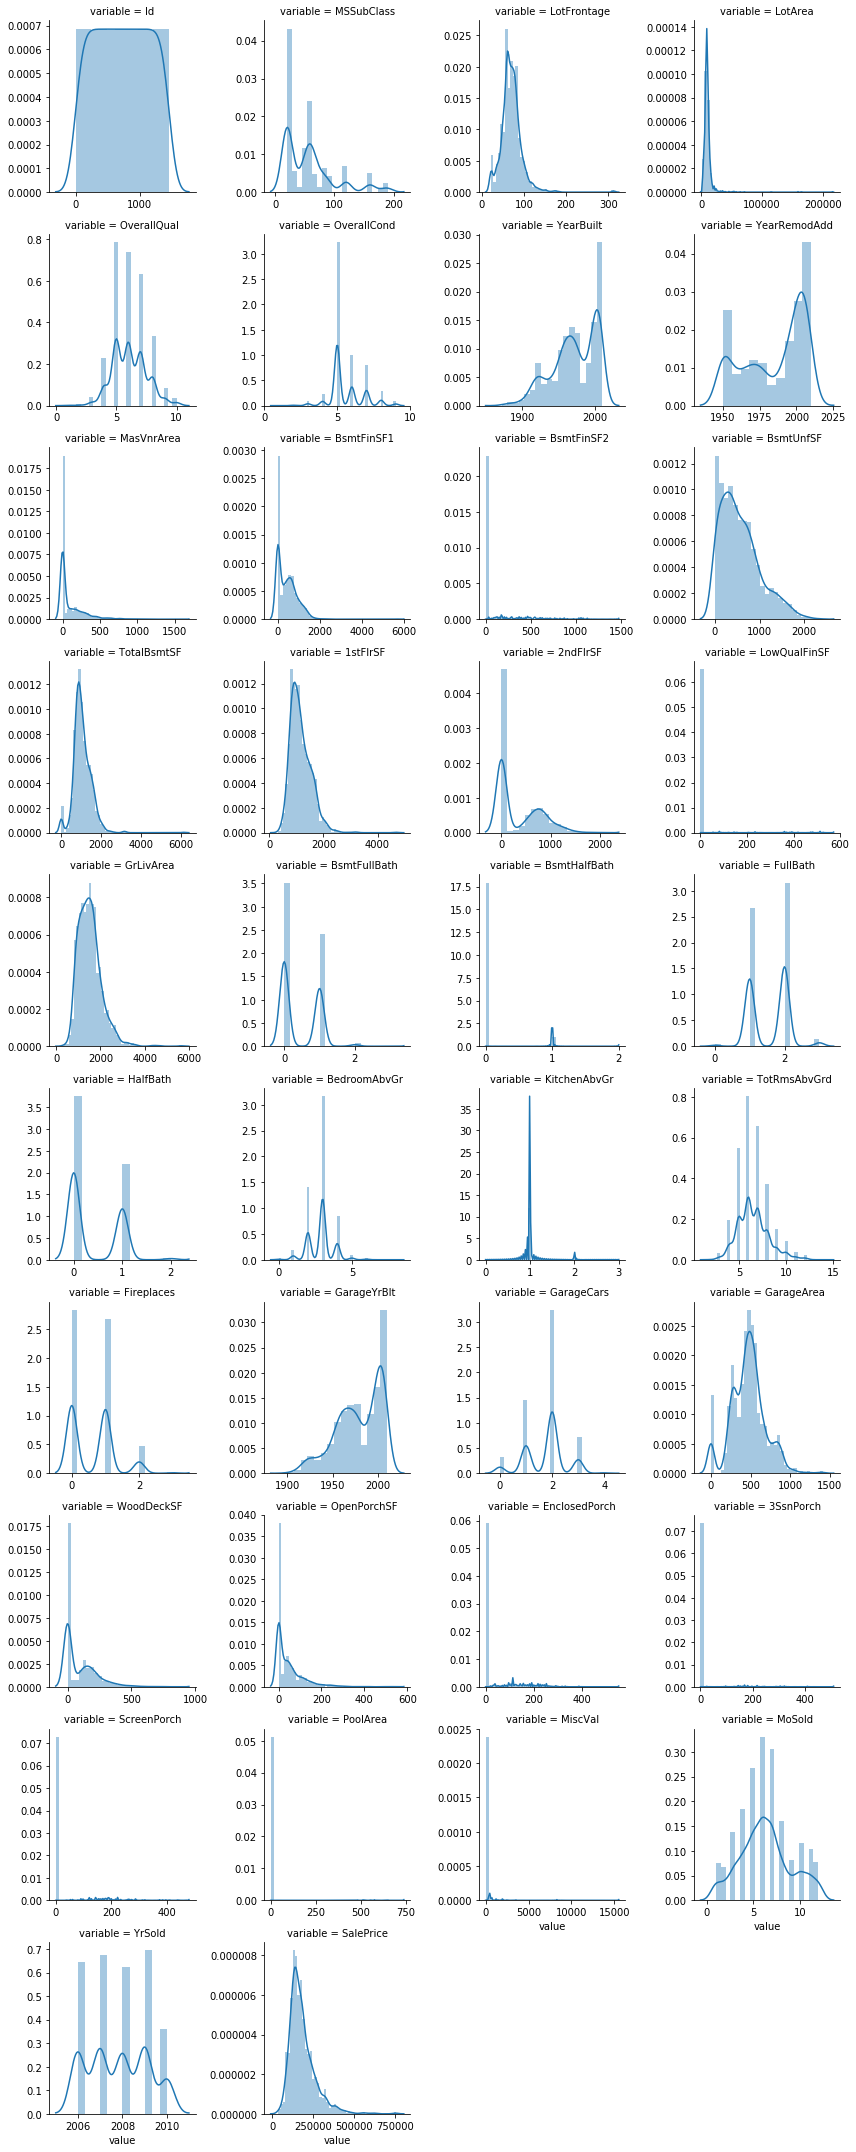

In [11]:
x = pd.melt(train_df, value_vars=quant_train)
x1 = sns.FacetGrid(x, col='variable', col_wrap =4 ,sharex= False, sharey = False)
x1 = x1.map(sns.distplot, 'value')

As we can see there are a few of the variables such as _'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath' GarageYearBuilt' and 'Fireplaces'_ are considered as continuous variable but this graphs shows they are categorical in nature. 
Whereas, _'GrLiveArea', 'LotArea', 'MSSubClass' and 'LotForntage'_ are highly skewed data, probably converting them in log scale will increase our model for better prediction. 

**3.5 Correlation Matrix for our variables.**

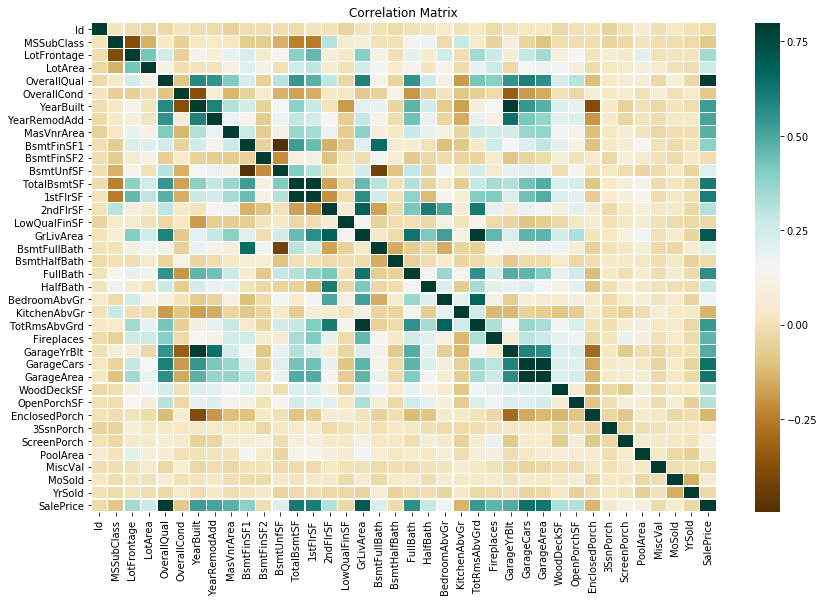

In [12]:
cm = train_df.corr()
f, ax = plt.subplots(figsize=(14,9))
plt.title('Correlation Matrix')
sns.heatmap(cm, vmax=0.8, cmap='BrBG', linewidth=0.2 )

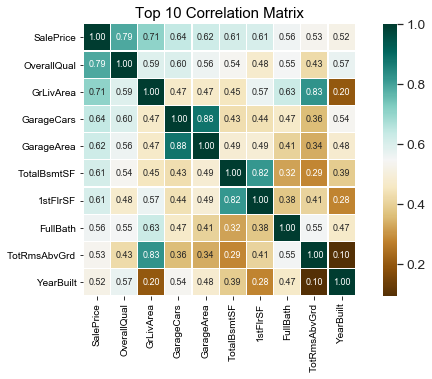

In [13]:
n = 10
corrmat = train_df.corr()
c = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[c].values.T)
#print(cm)

f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale=1.25)

plt.title('Top 10 Correlation Matrix')
m = sns.heatmap(cm, cbar=True, annot= True, square= True, fmt = '.2f',
               annot_kws = {'size': 9}, yticklabels = c.values,
               xticklabels = c.values, cmap='BrBG', linewidth=.2)
plt.show()



_'GarageCars'_ and _'GarageArea'_ are very strongly related, so it can be assumed that there is multicolinearity between them so we will keep _'GarageArea'_ and remove _'GarageCars'_



**3.6 Exploring the categorical variables** 

Here, we want to explore the categorical variables but before starting exploring I will replace all the missing values with the term 'Missing' in order to have a better understand of the data.

In [14]:
train_df1 = train_df.copy()
for v in qual_train:
    train_df1[v] = train_df[v].astype('category')
    if train_df1[v].isnull().any():
        train_df1[v] = train_df1[v].cat.add_categories(['Missing'])
        train_df1[v] = train_df1[v].fillna('Missing')

Next, we we create boxplots for each of the variables to understand their nature.

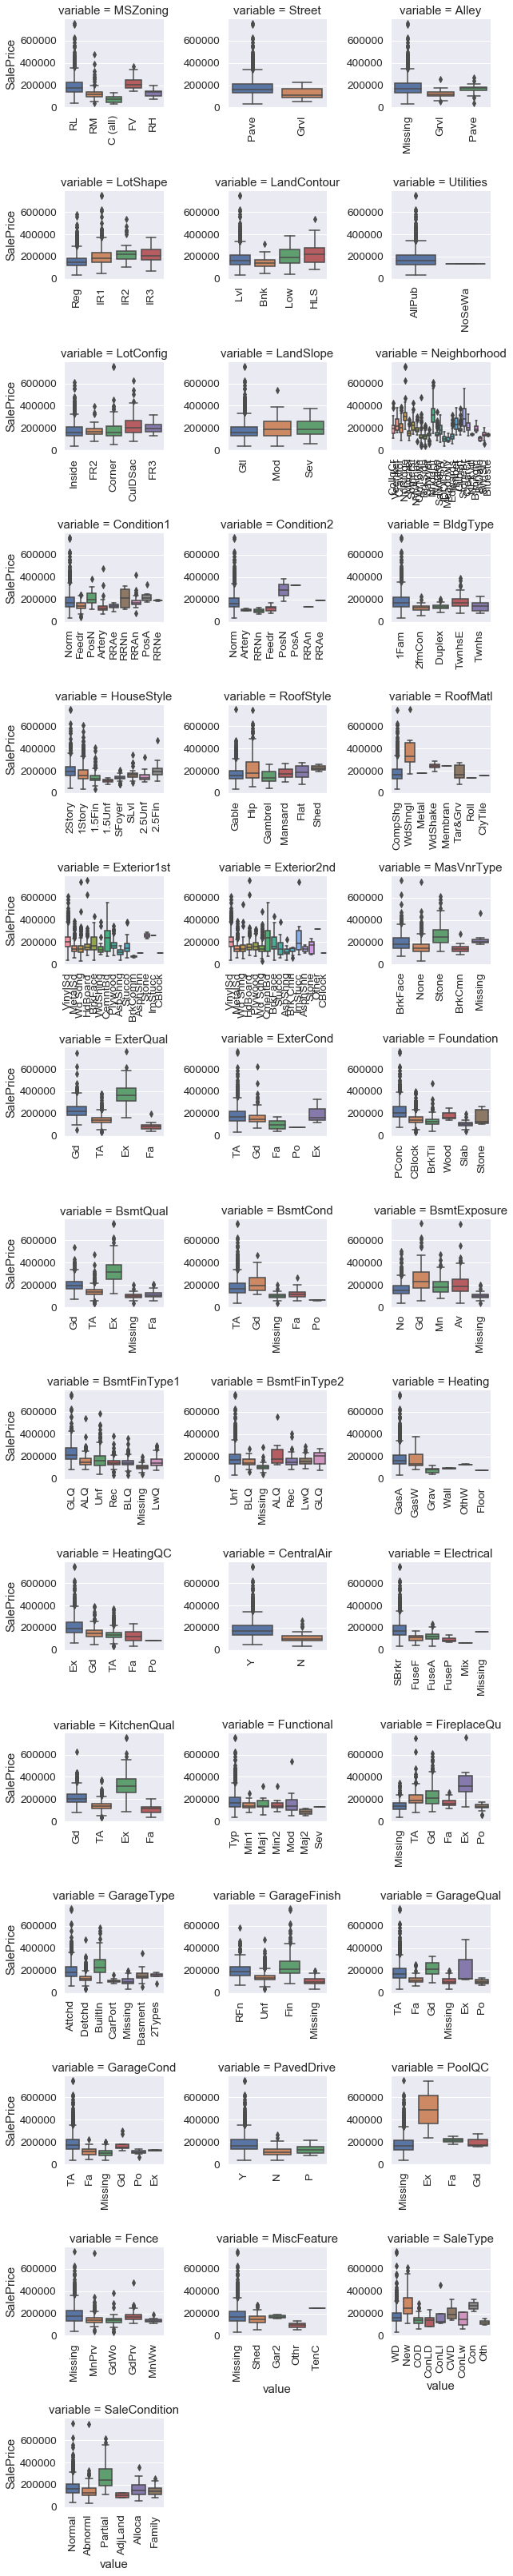

In [15]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

a = pd.melt(train_df1, id_vars =['SalePrice'], value_vars =qual_train )
b = sns.FacetGrid(a, col='variable', col_wrap=3, sharex=False, sharey=False)
b = b.map(boxplot, 'value', 'SalePrice')

## 4. Missing Data

Treating missing data for any dataset is utmost important thing but before we can treat them differently we need to find those missing data base on that we can device our plan.

In [16]:
for column in train_df:
    if train_df[column].isnull().any():
       print('{0} has {1} null values i.e. {2}%.'.format(column, train_df[column].isnull().sum(), round((train_df[column].isnull().sum()/rows)*100, 2) ))

LotFrontage has 259 null values i.e. 17.74%.
Alley has 1369 null values i.e. 93.77%.
MasVnrType has 8 null values i.e. 0.55%.
MasVnrArea has 8 null values i.e. 0.55%.
BsmtQual has 37 null values i.e. 2.53%.
BsmtCond has 37 null values i.e. 2.53%.
BsmtExposure has 38 null values i.e. 2.6%.
BsmtFinType1 has 37 null values i.e. 2.53%.
BsmtFinType2 has 38 null values i.e. 2.6%.
Electrical has 1 null values i.e. 0.07%.
FireplaceQu has 690 null values i.e. 47.26%.
GarageType has 81 null values i.e. 5.55%.
GarageYrBlt has 81 null values i.e. 5.55%.
GarageFinish has 81 null values i.e. 5.55%.
GarageQual has 81 null values i.e. 5.55%.
GarageCond has 81 null values i.e. 5.55%.
PoolQC has 1453 null values i.e. 99.52%.
Fence has 1179 null values i.e. 80.75%.
MiscFeature has 1406 null values i.e. 96.3%.


Text(0.5, 1.0, 'The columns with missing data for training dataset')

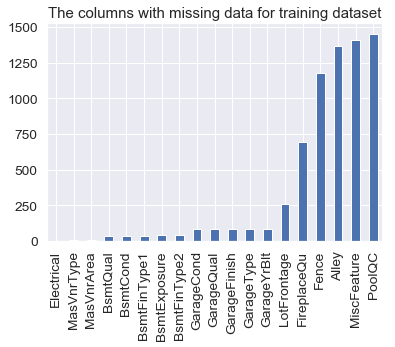

In [17]:
train_df_missing = train_df.isnull().sum()
train_df_missing = train_df_missing[train_df_missing > 0]
train_df_missing.sort_values(inplace=True)
train_df_missing.plot.bar()
plt.title('The columns with missing data for training dataset')

As we can see _'PoolQC', 'MiscFeature', 'Alley' and 'Fence'_ has a huge number of missing data, instead of imputing the missing data will not help us rather removing them will be a better choice.


#### **_Test Data_** 

We want to explore the missing data for the test dataset similarly like our training data.

In [18]:
# Reading and exploring the test data
test_df = pd.read_csv('test.csv')

In [19]:
rows_test, columns_test = test_df.shape
print('No of Rows {0} and No of Columns {1}'. format(rows_test, columns_test))

No of Rows 1459 and No of Columns 80


In [20]:
for column in test_df:
    if test_df[column].isnull().any():
       print('{0} has {1} null values i.e. {2}% of null values.'.format(column, test_df[column].isnull().sum(), round((test_df[column].isnull().sum()/rows_test)*100, 2) ))

MSZoning has 4 null values i.e. 0.27% of null values.
LotFrontage has 227 null values i.e. 15.56% of null values.
Alley has 1352 null values i.e. 92.67% of null values.
Utilities has 2 null values i.e. 0.14% of null values.
Exterior1st has 1 null values i.e. 0.07% of null values.
Exterior2nd has 1 null values i.e. 0.07% of null values.
MasVnrType has 16 null values i.e. 1.1% of null values.
MasVnrArea has 15 null values i.e. 1.03% of null values.
BsmtQual has 44 null values i.e. 3.02% of null values.
BsmtCond has 45 null values i.e. 3.08% of null values.
BsmtExposure has 44 null values i.e. 3.02% of null values.
BsmtFinType1 has 42 null values i.e. 2.88% of null values.
BsmtFinSF1 has 1 null values i.e. 0.07% of null values.
BsmtFinType2 has 42 null values i.e. 2.88% of null values.
BsmtFinSF2 has 1 null values i.e. 0.07% of null values.
BsmtUnfSF has 1 null values i.e. 0.07% of null values.
TotalBsmtSF has 1 null values i.e. 0.07% of null values.
BsmtFullBath has 2 null values i.e. 0.

Text(0.5, 1.0, 'The columns with missing data for testing dataset')

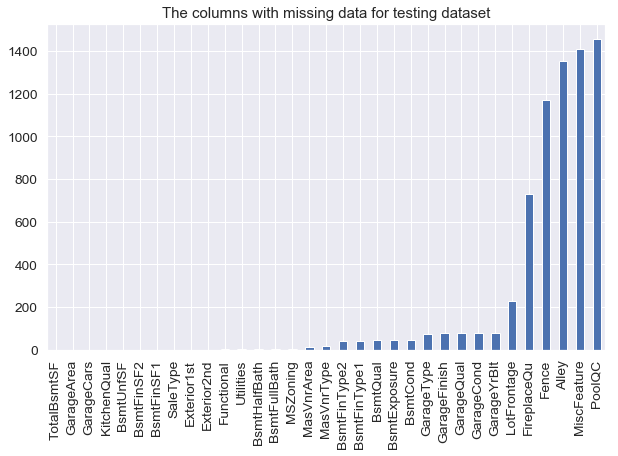

In [21]:
f, ax = plt.subplots(figsize=(10,6))
test_df_missing = test_df.isnull().sum()
test_df_missing = test_df_missing[test_df_missing > 0]
test_df_missing.sort_values(inplace=True)
test_df_missing.plot.bar()
plt.title('The columns with missing data for testing dataset')

Compare to training data set there are more variables that contains null values for the testing dataset, but similar to training dataset, _PoolQc, Fence, MiscFeatures and Alley_ has more than 80% missing data, therefore removing all these features from the both the traing and testing dataset will be better choice. 

As we know any kind of feature engineering we will perform on the training data set has to perform on testing dataset too. Instead of perfroming twice, we can merge both these dataset then perform the feature engineering and then detach them into training and testing dataset will be good option.

## 5. Feature Engineering 

**5.1 Merged DataSet**

As we know, the training data set 14060 rows and 81 columns whereas testing dataset has 1459 rows and 80 columns (no 'SalePrice'), we can merge them column wise to create a single dataset. 

In [22]:
print(train_df.shape, test_df.shape)

(1460, 81) (1459, 80)


In [23]:
merge_df = pd.concat([train_df, test_df], axis=0)

In [24]:
total_row, total_column = merge_df.shape
print('The merged data has {0} rows and {1} columns'.format(total_row, total_column))

The merged data has 2919 rows and 81 columns


**5.2 Treating the missing values**

As we have discussed before, it is more sensible idea to treat the missing data for the merged database. So, our idea is to find the columns that has null values. If the amount of null values are more than 50% then we will removes those columns otherwise we will impute them based on the nature of the data, e.g. for the categorical variables we will replace the missing values with the mode values of the columns. But in case of continuous variable we have chosen the median value as the replacement of the missing values. Since, none of the continuous variables has shown the Normal distribution, imputation with mean value is much better choice than mean values.  

In [25]:
for column in merge_df:
    if merge_df[column].isnull().any():
       print('{0} has {1} null values i.e. {2}% of null values.'.format(column, merge_df[column].isnull().sum(), round((merge_df[column].isnull().sum()/total_row)*100, 2) ))

MSZoning has 4 null values i.e. 0.14% of null values.
LotFrontage has 486 null values i.e. 16.65% of null values.
Alley has 2721 null values i.e. 93.22% of null values.
Utilities has 2 null values i.e. 0.07% of null values.
Exterior1st has 1 null values i.e. 0.03% of null values.
Exterior2nd has 1 null values i.e. 0.03% of null values.
MasVnrType has 24 null values i.e. 0.82% of null values.
MasVnrArea has 23 null values i.e. 0.79% of null values.
BsmtQual has 81 null values i.e. 2.77% of null values.
BsmtCond has 82 null values i.e. 2.81% of null values.
BsmtExposure has 82 null values i.e. 2.81% of null values.
BsmtFinType1 has 79 null values i.e. 2.71% of null values.
BsmtFinSF1 has 1 null values i.e. 0.03% of null values.
BsmtFinType2 has 80 null values i.e. 2.74% of null values.
BsmtFinSF2 has 1 null values i.e. 0.03% of null values.
BsmtUnfSF has 1 null values i.e. 0.03% of null values.
TotalBsmtSF has 1 null values i.e. 0.03% of null values.
Electrical has 1 null values i.e. 0.0

Text(0.5, 1.0, 'The columns with missing data for testing dataset')

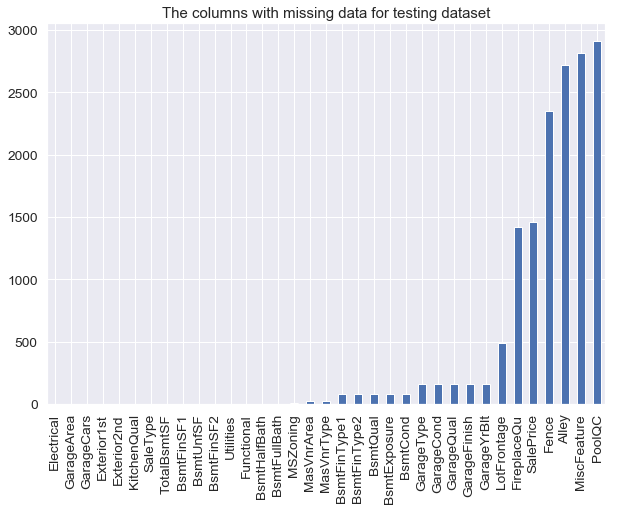

In [26]:
f, ax = plt.subplots(figsize=(10,7))
merge_df_missing = merge_df.isnull().sum()
merge_df_missing = merge_df_missing[merge_df_missing > 0]
merge_df_missing.sort_values(inplace=True)
merge_df_missing.plot.bar()
plt.title('The columns with missing data for testing dataset')

**Removing columns with more than 50% missing values!**

In [27]:
merge_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
print("Columns Alley, PoolQC, Fence and MiscFeature dropped!")

Columns Alley, PoolQC, Fence and MiscFeature dropped!


**Converting some of the numerical column into categorical type.**

Next, we will convert those variable that we were considered as numerical but they are categorical in nature. 

In [28]:
merge_df['MoSold'] = merge_df['MoSold'].astype('str')
merge_df['BsmtFullBath'] = merge_df['BsmtFullBath'].astype('str')
merge_df['BsmtHalfBath'] = merge_df['BsmtHalfBath'].astype('str')
merge_df['FullBath'] = merge_df['FullBath'].astype('str')
merge_df['HalfBath'] = merge_df['HalfBath'].astype('str')
merge_df['Fireplaces'] = merge_df['Fireplaces'].astype('str')
merge_df['OverallCond'] = merge_df['OverallCond'].astype('str')

**Treatment of other missing values**

We have created two funtion that will operate on the merged data frame then find each of the columns, if the nature of the column is categorical then the function will replace the null values with the mode and if the columns is numerical then the missing value will be impute with the mean values.

In [29]:
def fill_nan_with_mode(a):
    for x in a.columns:
        if a.dtypes[x] == 'object':
            if a[x].isnull().any():
                a[x] = a[x].fillna(a[x].mode()[0])
return       

In [30]:
a = merge_df  
fill_nan_with_mode(a)
print('Missing data for Categorical Variables are replaced with "Mode" values')

Missing data for Categorical Variables are replaced with "Mode" values


In [31]:
def fill_nan_with_mean(a):
    for x in a.columns:
        if a.dtypes[x] != 'object':
            if a[x].isnull().any():
                a[x] = a[x].fillna(a[x].mean())
return

In [32]:
a = merge_df  
fill_nan_with_mean(a)
print('Missing data for Continous Variables are replaced with "Mean" values')

Missing data for Continous Variables are replaced with "Mean" values


In [33]:
for column in merge_df:
    if merge_df[column].isnull().any():
       print('{0} has {1} null values i.e. {2}% of null values.'.format(column, merge_df[column].isnull().sum(), round((merge_df[column].isnull().sum()/total_row)*100,2)))

print('There is no null value in the dataset!')

There is no null value in the dataset!


**5.3 Adding a new feature**

We have added a new feature called 'TotalSF' which is basically sum of 'TotalBsmtSF', '1srFlrSF' and '2ndFlrSF'

In [34]:
merge_df['TotalSF'] = merge_df['TotalBsmtSF'] + merge_df['1stFlrSF'] +merge_df['2ndFlrSF']

**5.4 Reducing features**

_'MasVnrType'_ and _'MasVnrArea'_ are two non-essential variables also they are strongly related to _'YearBuilt'_ and _'OverallQual'_ so we can remove them and as we have discussed before because of multicollinearity we can also remove _'GarageCars'_ 

In [35]:
merge_df = merge_df.drop(['MasVnrType', 'MasVnrArea', 'GarageCars', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis =1)

**5.4 Boxcox Transformation** 

As we have discussed before, some of the continuous variables are skewd a quite bit and I need to treat them for our modeling purpose, so first we have calculated the skew for for each of the variables then perform a Boxcox transformation for those variables which are highly skewed. 

In [36]:
quan_merge = merge_df.dtypes[merge_df.dtypes != 'object'].index

skewed = merge_df[quan_merge].apply(lambda x: x.skew()).sort_values(ascending = False)
skewness = pd.DataFrame({'Skew' : skewed})
skewness.head(8)

,Skew
MiscVal,21.958480
PoolArea,16.907017
LotArea,12.829025
LowQualFinSF,12.094977
3SsnPorch,11.381914
KitchenAbvGr,4.304467
BsmtFinSF2,4.148166
EnclosedPorch,4.005950


In [37]:
from scipy.special import boxcox1p

def boxcox_transformer(cname):
    merge_df[cname] = boxcox1p(merge_df[cname], 0.15)
    return   

In [38]:
boxcox_transformer('PoolArea')
boxcox_transformer('3SsnPorch')
boxcox_transformer('LowQualFinSF')
boxcox_transformer('MiscVal')
boxcox_transformer('KitchenAbvGr')
boxcox_transformer('ScreenPorch')
boxcox_transformer('BsmtFinSF2')
boxcox_transformer('EnclosedPorch')

**5.5 Converting the categorical variables into dummy variable**

Since, we have a few independent variables which are categorical in nature with different values, we need to convert them into dummy variable. And to perform that task we created a function that will take each of the categocial variables then convert them to dummy variables. 

In [39]:
def category_to_numericals(columns):
    df_merge=merge_df
    i=0
    for fields in columns:
        
        print(fields)
        df1=pd.get_dummies(merge_df[fields],drop_first=True)
        
        merge_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_merge=df1.copy()
        else:
            
            df_merge=pd.concat([df_merge,df1],axis=1)
        i=i+1
       
        
    df_merge=pd.concat([merge_df,df_merge],axis=1)
        
    return df_merge

In [40]:
qual_merge = [x for x in merge_df.columns if merge_df.dtypes[x] == 'object']
merge_df=category_to_numericals(qual_merge)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallCond
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
KitchenQual
Functional
Fireplaces
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
MoSold
SaleType
SaleCondition


In [ ]:
merge_df.head()

In [41]:
merge_df.shape

(2919, 259)

In [42]:
merge_df =merge_df.loc[:,~merge_df.columns.duplicated()]
print('All the duplicate columns are removed')

All the duplicate columns are removed


In [44]:
merge_df = merge_df.drop(['Id'], axis =1)
print('The "Id" column is removed from the dataset')

The "Id" column is removed from the dataset


In [45]:
merge_df.shape

(2919, 180)

In [46]:
df_Train=merge_df.iloc[:1460,:]
X_Test=merge_df.iloc[1460:,:]

In [47]:
X_Test.drop(['SalePrice'],axis=1,inplace=True)

In [48]:
X_train=df_Train.drop(['SalePrice'],axis=1)

**Converting the 'SalePrice' into (log+1) scale.**

In [49]:
df_Train['SalePrice'] = np.log1p(df_Train['SalePrice'])
y_train=df_Train['SalePrice']

## 6. Model Creation

**6.1 Working with multiple regression algorithm**

Since, we do not know which of the algorith will give us the better result, so we have created a function that will take different regression model as defined in the function, here we have considered, _Linear Regression, Ridge Regession, Lasso Regression, Support Vector Regression, ElasticNet and XGBoost_ model.

Then, we have performed a 10 fold cross validation for each of these model and find the RMSE for each of them. This will give us some idea about the model that will perform better. 

**Base Model**

In [50]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['RidgeRegression'] = Ridge(alpha = 1)
    models['LassoRegression'] = Lasso(alpha = 0.001)
    models['LassoLarsCV'] = LassoLarsCV()
    models['SVR'] = SVR(C = 10)
    models['ElasticNet'] = ElasticNet(alpha = 0.001)
    return models

In [51]:
# get the models to evaluate
models = get_models()
trainedModels = dict()
predOnTrain = dict()
predOnTest = dict()
results, names = list(), list()
for name, model in models.items():
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1, error_score='raise'))
    trainedModels[name] = model.fit(X_train, y_train)
    predOnTrain[name] = model.predict(X_train)
    predOnTest[name] = model.predict(X_Test)
    results.append(scores)
    names.append(name)
    print('Algorithm Name: {0} and Means of Root Mean Squared Score: {1} ({2})'.format(name, round(np.mean(scores), 6), round(scores.std(),6)))

Algorithm Name: RidgeRegression and Means of Root Mean Squared Score: 0.143983 (0.037968)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Algorithm Name: LassoRegression and Means of Root Mean Squared Score: 0.14301 (0.039433)
Algorithm Name: LassoLarsCV and Means of Root Mean Squared Score: 0.143207 (0.037312)
Algorithm Name: SVR and Means of Root Mean Squared Score: 0.397654 (0.027441)
Algorithm Name: ElasticNet and Means of Root Mean Squared Score: 0.142107 (0.038685)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


**XGBoost and Hyper parameter tuning**

Whenever we define an estimator for the machine learning modeling, the model only consider the default parameters. Although these default parameters give us a tentative result but to achieve a better performance we need to tune the parameteres. Sklearn has two useful library for that task _GridSearchCV and RandomizedSearchCV._

For our XGBRegressor() model we have used RandomizedSearchCV to fine tune the parameters. Basically, this function will take some of the possible values and try to different combination to find the best possible values of the parameters that will give best result.

In [52]:
regressor=xgboost.XGBRegressor()

In [53]:
# Hyper Parameter Optimisation
n_estimators = [100, 500, 900, 1200, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.2]
min_child_weight = [1,2,3,4]
base_score = [0.25, 0.5, 0.75, 1]

In [54]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [55]:
# Set up the random search with 4-fold cross validation

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_squared_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [56]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   46.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 14.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1200, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=5)

In [57]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=900, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [58]:
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.15, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, monotone_constraints=None,
       n_estimators=500, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [59]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_Test)

In [60]:
y_pred = np.expm1(y_pred)
print(y_pred)
df_pred = pd.DataFrame(y_pred)
sub_file = pd.read_csv('sample_submission.csv')
data = pd.concat([sub_file.Id, df_pred], axis=1)
data.columns = ['Id', 'SalePrice']
print(data)
data.to_csv('C:/Users/Tuhin/Downloads/Kaggle Comp/Jack/sample_submission.csv', index=False)

[124934.73 167650.88 186083.47 ... 169000.92 119052.17 211830.81]
        Id      SalePrice
0     1461  124934.726562
1     1462  167650.875000
2     1463  186083.468750
3     1464  195255.578125
4     1465  196868.468750
...    ...            ...
1454  2915   81415.867188
1455  2916   78882.414062
1456  2917  169000.921875
1457  2918  119052.171875
1458  2919  211830.812500

[1459 rows x 2 columns]


## 7. Stacking

Stacking is an ensemble machine learning algorithm. Basically, it uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

One of the benefits of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task (here we have only used the regression) and make predictions that have better performance than any single model in the ensemble.

Here, we have used one method for stacking. In this method, we have taken a two-level approach, in level 0, we trained our model with the training data and then predict the training data itself using all of our base models. At the same time, we have predicted with our test data. 

Next in the level 1, the predicted values generated for each of the models is used as the input to create the new model and finally, it predicts on the data that comes from the test data prediction.

For level 0 we have used different regression algorithms such as RidgeRegression, LassoRegression, LassoLarsCV, Support Vector Regression and ElasticNet and then in level 1 we have used the XGBoost algorithm.


**7.1 Method**

In [61]:
xtrainpred = pd.DataFrame(predOnTrain)#1460,6
xtestpred = pd.DataFrame(predOnTest)#1459,6

trainmodel = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)
trmod = trainmodel.fit(xtrainpred,y_train)#1460,6
y_pred = trmod.predict(xtestpred)

In [62]:
y_pred = np.expm1(y_pred)
df_pred = pd.DataFrame(y_pred)
print(df_pred)
sub_file = pd.read_csv('sample_submission.csv')
data = pd.concat([sub_file.Id, df_pred], axis=1)
data.columns = ['Id', 'SalePrice']
data.to_csv('C:/Users/Tuhin/Downloads/Kaggle Comp/Jack/sample_submission.csv', index=False)

                  0
0     161742.921875
1     162730.515625
2     168440.171875
3     174687.515625
4     175718.953125
...             ...
1454  161742.921875
1455  161742.921875
1456  164755.703125
1457  161742.921875
1458  175718.953125

[1459 rows x 1 columns]


### 8. Appendix: Hyper parameter tuning for all other algorithms

As we have dicussed above about the hyper parameter tuning, in this section we have tuned the parameters for each of the models and then we have used them in our model to achieve a better performance. And we also created a submission file for each of these models to see how they perform on the Kaggle Leeaderboard. 

**8.1 Ridge Regression**

In [ ]:
ridge = Ridge()
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60, 100]}
ridge_reg = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv = 5)
ridge_reg.fit(X_train, y_train)

In [ ]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

In [ ]:
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_Test)
y_pred = np.expm1(y_pred)
df_pred = pd.DataFrame(y_pred)
print(df_pred)
sub_file = pd.read_csv('sample_submission.csv')
data = pd.concat([sub_file.Id, df_pred], axis=1)
data.columns = ['Id', 'SalePrice']
data.to_csv('C:/Users/Tuhin/Downloads/Kaggle Comp/Jack/sample_submission.csv', index=False)

**8.2 Lasso Regression**

In [ ]:
lasso = Lasso()
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60, 100]}
lasso_reg = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv = 5)
lasso_reg.fit(X_train, y_train)

In [ ]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

In [ ]:
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_Test)
y_pred_lasso = np.exp(y_pred_lasso)

In [ ]:
print(y_pred_lasso)

In [ ]:
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_Test)
y_pred = np.expm1(y_pred)
df_pred = pd.DataFrame(y_pred)
print(df_pred)
sub_file = pd.read_csv('sample_submission.csv')
data = pd.concat([sub_file.Id, df_pred], axis=1)
data.columns = ['Id', 'SalePrice']
data.to_csv('C:/Users/Tuhin/Downloads/Kaggle Comp/Jack/sample_submission.csv', index=False)

**8.3 Support Vector Regression**

In [ ]:
svr = SVR()
params = { 'C': [1, 10, 100, 1000]}
svr_reg = RandomizedSearchCV(svr, params, scoring='neg_mean_squared_error', cv = 5, n_iter = 2)
svr_reg.fit(X_train, y_train)

In [ ]:
print(svr_reg.best_params_)
print(svr_reg.best_score_)

In [ ]:
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_Test)
y_pred = np.expm1(y_pred)
df_pred = pd.DataFrame(y_pred)
print(df_pred)
sub_file = pd.read_csv('sample_submission.csv')
data = pd.concat([sub_file.Id, df_pred], axis=1)
data.columns = ['Id', 'SalePrice']
data.to_csv('C:/Users/Tuhin/Downloads/Kaggle Comp/Jack/sample_submission.csv', index=False)

**8.4 ElasticNet Regression** 

In [ ]:
elasticnet = ElasticNet()
params = {'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60, 100]}
en_reg = RandomizedSearchCV(elasticnet, params, scoring='neg_mean_squared_error', cv = 5)
en_reg.fit(X_train, y_train)

In [ ]:
print(en_reg.best_params_)
print(en_reg.best_score_)

In [ ]:
en_reg.fit(X_train, y_train)
y_pred = en_reg.predict(X_Test)
y_pred = np.expm1(y_pred)
df_pred = pd.DataFrame(y_pred)
print(df_pred)
sub_file = pd.read_csv('sample_submission.csv')
data = pd.concat([sub_file.Id, df_pred], axis=1)
data.columns = ['Id', 'SalePrice']
data.to_csv('C:/Users/Tuhin/Downloads/Kaggle Comp/Jack/sample_submission.csv', index=False)

**8.5 XGBoost**

In [ ]:
regressor=xgboost.XGBRegressor()

In [ ]:
# Hyper Parameter Optimisation
n_estimators = [100, 500, 900, 1200, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.2]
min_child_weight = [1,2,3,4]
base_score = [0.25, 0.5, 0.75, 1]

In [ ]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_squared_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.15, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, monotone_constraints=None,
       n_estimators=500, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_Test)
y_pred = np.expm1(y_pred)
print(y_pred)
df_pred = pd.DataFrame(y_pred)
sub_file = pd.read_csv('sample_submission.csv')
data = pd.concat([sub_file.Id, df_pred], axis=1)
data.columns = ['Id', 'SalePrice']
print(data)
data.to_csv('C:/Users/Tuhin/Downloads/Kaggle Comp/Jack/sample_submission.csv', index=False)